In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-sales-forecast/features.csv
/kaggle/input/walmart-sales-forecast/stores.csv
/kaggle/input/walmart-sales-forecast/train.csv
/kaggle/input/walmart-sales-forecast/test.csv


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
train_df = pd.read_csv("/kaggle/input/walmart-sales-forecast/train.csv", header=0)
store_df = pd.read_csv("/kaggle/input/walmart-sales-forecast/stores.csv", header=0)
feature_df = pd.read_csv("/kaggle/input/walmart-sales-forecast/features.csv", header=0)


In [ ]:
train_df.info()

In [55]:
store_df['Type'] = store_df['Type'].replace({'A': 1, 'B': 2, 'C': 3})


<ipython-input-55-0731e513e70a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  store_df['Type'] = store_df['Type'].replace({'A': 1, 'B': 2, 'C': 3})


In [114]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [115]:
feature_df.tail(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


## Check Missing Value

In [56]:
feature_df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] = feature_df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
feature_df['CPI'].fillna(feature_df['CPI'].median(),inplace=True)
feature_df['Unemployment'].fillna(feature_df['Unemployment'].median(),inplace=True)
feature_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


<ipython-input-56-5c076f79e496>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feature_df['CPI'].fillna(feature_df['CPI'].median(),inplace=True)
<ipython-input-56-5c076f79e496>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [57]:
merged_df = train_df.merge(store_df, on="Store", how="left")
merged_df.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,1,151315
1,1,1,2010-02-12,46039.49,True,1,151315
2,1,1,2010-02-19,41595.55,False,1,151315
3,1,1,2010-02-26,19403.54,False,1,151315
4,1,1,2010-03-05,21827.90,False,1,151315
5,1,1,2010-03-12,21043.39,False,1,151315
6,1,1,2010-03-19,22136.64,False,1,151315
7,1,1,2010-03-26,26229.21,False,1,151315
8,1,1,2010-04-02,57258.43,False,1,151315
9,1,1,2010-04-09,42960.91,False,1,151315


In [58]:
merged_df = pd.merge(merged_df,feature_df, on=['Store','Date'], how="left")
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Type          421570 non-null  int64  
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     421570 non-null  float64
 10  MarkDown2     421570 non-null  float64
 11  MarkDown3     421570 non-null  float64
 12  MarkDown4     421570 non-null  float64
 13  MarkDown5     421570 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
 16  IsHoliday_y   421570 non-null  bool   
dtypes: bool(2), float64(10), int64(4), object(1)
mem

In [59]:
columns_to_drop = [
    "IsHoliday_y"]

merged_df.drop(columns=columns_to_drop, inplace=True)


merged_df.rename(columns={"IsHoliday_x":"IsHoliday"}, inplace=True)
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  int64  
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     421570 non-null  float64
 10  MarkDown2     421570 non-null  float64
 11  MarkDown3     421570 non-null  float64
 12  MarkDown4     421570 non-null  float64
 13  MarkDown5     421570 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(4), object(1)
memory usage: 48.6+ MB


## Feature Engineering

In [60]:
merged_df["Total_MarkDown"] = merged_df[["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]].sum(axis=1)


In [61]:
merged_df["Date"] = pd.to_datetime(merged_df["Date"])

merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month
merged_df["Week"] = merged_df["Date"].dt.isocalendar().week  


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           421570 non-null  int64         
 1   Dept            421570 non-null  int64         
 2   Date            421570 non-null  datetime64[ns]
 3   Weekly_Sales    421570 non-null  float64       
 4   IsHoliday       421570 non-null  bool          
 5   Type            421570 non-null  int64         
 6   Size            421570 non-null  int64         
 7   Temperature     421570 non-null  float64       
 8   Fuel_Price      421570 non-null  float64       
 9   MarkDown1       421570 non-null  float64       
 10  MarkDown2       421570 non-null  float64       
 11  MarkDown3       421570 non-null  float64       
 12  MarkDown4       421570 non-null  float64       
 13  MarkDown5       421570 non-null  float64       
 14  CPI             421570 non-null  flo

In [62]:
columns_to_drop = ["Date","MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", 
    "MarkDown5"
]
merged_df["IsHoliday"] = merged_df["IsHoliday"].astype(int)

merged_df.drop(columns=columns_to_drop, inplace=True)
merged_df.head(10)

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Total_MarkDown,Year,Month,Week
0,1,1,24924.50,0,1,151315,42.31,2.572,211.096358,8.106,0.0,2010,2,5
1,1,1,46039.49,1,1,151315,38.51,2.548,211.242170,8.106,0.0,2010,2,6
2,1,1,41595.55,0,1,151315,39.93,2.514,211.289143,8.106,0.0,2010,2,7
3,1,1,19403.54,0,1,151315,46.63,2.561,211.319643,8.106,0.0,2010,2,8
4,1,1,21827.90,0,1,151315,46.50,2.625,211.350143,8.106,0.0,2010,3,9
5,1,1,21043.39,0,1,151315,57.79,2.667,211.380643,8.106,0.0,2010,3,10
6,1,1,22136.64,0,1,151315,54.58,2.720,211.215635,8.106,0.0,2010,3,11
7,1,1,26229.21,0,1,151315,51.45,2.732,211.018042,8.106,0.0,2010,3,12
8,1,1,57258.43,0,1,151315,62.27,2.719,210.820450,7.808,0.0,2010,4,13
9,1,1,42960.91,0,1,151315,65.86,2.770,210.622857,7.808,0.0,2010,4,14


In [ ]:
merged_df = merged_df[merged_df['Weekly_Sales'] > 0]


In [75]:

from sklearn.preprocessing import LabelEncoder, StandardScaler

merged_df = merged_df.sort_values(by=["Year", "Month", "Week"])

y = merged_df["Weekly_Sales"]
X = merged_df.drop(columns=["Weekly_Sales"])


X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)
X = X.astype(np.float64)

train_years = 2011
test_year = 2012  

X_train = X[X["Year"] == train_years]
y_train = y[X["Year"] == train_years]

X_test = X[X["Year"] == test_year]
y_test = y[X["Year"] == test_year]


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Train Set Size:", X_train_scaled.shape, y_train.shape)
print("✅ Test Set Size:", X_test_scaled.shape, y_test.shape)


✅ Train Set Size: (152940, 13) (152940,)
✅ Test Set Size: (127008, 13) (127008,)


In [76]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Train a model to find feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

X_train_selected = X_train
X_test_selected = X_test



In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred_rf = rf.predict(X_test_selected)

r2_rf = r2_score(y_test, y_pred_rf) 
mse_rf = mean_squared_error(y_test, y_pred_rf)  
rmse_rf = np.sqrt(mse_rf)  
mae_rf = mean_absolute_error(y_test, y_pred_rf) 

print(f"Random Forest R² Score: {r2_rf:.4f}")
print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest MAE: {mae_rf:.2f}")

Random Forest R² Score: 0.9237
Random Forest MSE: 37385643.41
Random Forest RMSE: 6114.38
Random Forest MAE: 2686.31


## EDA

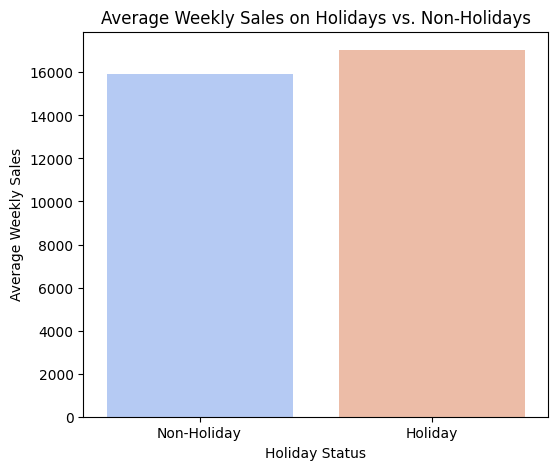

In [224]:
holiday_sales = merged_df.groupby("IsHoliday")["Weekly_Sales"].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(x="IsHoliday", y="Weekly_Sales", data=holiday_sales, palette="coolwarm")

plt.xticks([0, 1], ["Non-Holiday", "Holiday"])
plt.xlabel("Holiday Status")
plt.ylabel("Average Weekly Sales")
plt.title("Average Weekly Sales on Holidays vs. Non-Holidays")
plt.show()
